<a href="https://colab.research.google.com/github/rajeshsahu09/CS69002_9A_18CS60R19/blob/master/DL_Assign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Movie Review Sentiment Analysis

### Import Header Files

In [0]:
import torch
import pandas as pd
import numpy as np
import io

### Load the Dataset and Visualise

In [0]:
# from google.colab import files
# uploaded = files.upload()

# import io
# df_train = pd.read_csv(io.StringIO(uploaded['Train_20K.csv'].decode('utf-8')), sep='\t')
# df_train.head()
url = "https://raw.githubusercontent.com/rajeshsahu09/CS69002_9A_18CS60R19/master/Dataset/Train_20K.csv?token=As1EmI0GPOj5OpjYAlhWRT6mMktHzaPPks5cn6hxwA%3D%3D"
df_train = pd.read_csv(url, sep='\t')

In [0]:
# from google.colab import files
# uploaded = files.upload()

# import io
# df_val = pd.read_csv(io.StringIO(uploaded['check.csv'].decode('utf-8')), sep='\t')
# df_val.head()
url = "https://raw.githubusercontent.com/rajeshsahu09/CS69002_9A_18CS60R19/master/Dataset/check.csv?token=As1EmE_KgnB6UgrlOw1DW1N_E45ndWMMks5cn6jdwA%3D%3D"
df_val = pd.read_csv(url, sep='\t')

In [0]:
# from google.colab import files
# uploaded = files.upload()

# import io
# df_test = pd.read_csv(io.StringIO(uploaded['Test_5K.csv'].decode('utf-8')), sep='\t')
# df_test.head()
url = "https://raw.githubusercontent.com/rajeshsahu09/CS69002_9A_18CS60R19/master/Dataset/Test_5K.csv?token=As1EmIN_Eayhyyb4Mc_XXDoSdtSV9t-Dks5cn6kKwA%3D%3D"
df_test = pd.read_csv(url, sep='\t')

In [393]:
print('Number of Negative movie reviews', len(df_train[df_train['label']==0]))
print('Number of Positive movie reviews', len(df_train[df_train['label']==1]))
print('Number of movie reviews', len(df_train['label']))

Number of Negative movie reviews 8994
Number of Positive movie reviews 9005
Number of movie reviews 17999


## Data pre-processing

### Train

In [394]:
train_raw_text_reviews = df_train['text'].astype(str).tolist()
len(train_raw_text_reviews), train_raw_text_reviews[-2]

(17999,
 'Anyone notice that Tommy only has 3 facial expressions.<br /><br />1. The angry eyes look he gives every enemy. 2. The holding of the hands to face, mouth agape and frightened eyes. 3. The smiling Tommy Turnbull.<br /><br />I have to say that i pretty much hate this show, i don\'t watch it but it\'s like Code Lyoko, we\'ve all watched at least one, i must say that this show is borderline racist, uninteresting and pointless.<br /><br />every episode ends with robotboy winning, except for one exception when robotboy basically let this overly geeky freakazoid fly away on a jetpack.<br /><br />The jokes are pretty crude too, i think it\'s mostly people saying the word "Suck" or farting, i think the bullies of the show are quite shocking too.<br /><br />Isn\'t there one that hides a bowling ball under his hate, and the other uses a chain, for god sake, what kind of school is he going to. Not to mention his older brother, who is borderline psychopathic and has no other character qu

In [395]:
train_text_labels = df_train['label'].astype(int)
len(train_text_labels), train_text_labels[len(train_text_labels)-2]

(17999, 0)

### Validation

In [396]:
val_raw_text_reviews = df_val['text'].astype(str).tolist()
len(val_raw_text_reviews), val_raw_text_reviews[-2]

(499,
 "This movie starts out brisk, has some slow moments in the middle, but generally moves along well, has a few very good moments, then peters out at the end of Act 3. I was able to get to see this in LA premieres 2 times (with 2 different endings). Jason Lee is a star, but he is not tomorrows leading man. He is humorous and holds his own, but he is better served as a supporting actor. Julia Stiles does 'ok' in a comedy role, new for her, but she doesn't 'steal' this movie, the way a star of her caliber should. For an actress who has so much potential(10 Things, Save the Last Dance, O), it is hard to watch her continue to do roles that are so 'average', and then not have her take the role and run away with the movie (like Daniel Day-Lewis did in 'Gangs'). Selma Blair is a good young actress as well, and does an 'ok' job. I didn't expect an academy award performance from her, and she didn't deliver one, but, her performance was adequate. Chris Koch delivers another film that is 'abo

In [397]:
val_text_labels = df_val['label'].astype(int)
len(val_text_labels), val_text_labels[len(val_text_labels)-2]

(499, 1)

### Test

In [398]:
test_raw_text_reviews = df_test['text'].astype(str).tolist()
len(test_raw_text_reviews), test_raw_text_reviews[-2]

(5000,
 'The Shining, you know what\'s weird about this movie? This is the movie that everyone, for people who claim to not like horror films, will always say that The Shining is a terrific film. This is Stanley Kubrick\'s classic vision of Stephen King\'s horror tale of madness and blood. This is just an incredible film and wither you have seen it or not, you have heard of it, know a few lines from it, and know some of the classic images. Who could forget Jack\'s "Here\'s Johnny!"? Who could forget "All Work and No Play Make Jack a Dull Boy"? Who could forget that chilling ending? This is the film that is unforgettable and honestly in my opinion is Kubrick\'s best work. I know there is a lot of argument in that department, a lot of people say it\'s 2001: A Space Odyssey or Clockwork Orange or even Dr. Strangelove, but if those film pioneered film making, then The Shining perfected it. This is the tale of isolation, madness, terrifying images, and the ultimate ghost story that will cra

In [399]:
test_text_labels = df_test['label'].astype(int)
len(test_text_labels), test_text_labels[len(val_text_labels)-2]

(5000, 1)

In [0]:
import re
import string
def preprocess_document(doc):
    # negative sense should not be eleminated + some short representation
    CONTRACTIONS = {"mayn't":"may not", "can't":"can not", "won't":"will not", "isn't":"is not", "amn't":"am not",\
                  "aren't":"are not", "wasn't":"was not", "weren't":"were not", "couldn't":"could not", \
                  "wouldn't":"would not", "don't":"do not", "doesn't":"does not",\
                  "i'll":"i will", "you'll":"you will", "they'll":"they will",\
                  "may've":"may have", "can've":"can have", "will've":"will have", "you've":"you have", \
                  "could've":"could have", "would've":"would have", "you've":"you have", "they":"they have",\
                  "i've":"i have", "you've":"you have", "we've":"we have", "there's":"there is", "i'm":"i am",\
                  "it's":"it is", "what's":"what is", "where's":"where is", "how's":"how is", "i'd":"i had"}
    punctuation = string.punctuation + "\n\n"
    punc_replace = ''.join([' ' for s in punctuation]); # required for replacing punctuation with null ('')
    doc_clean = doc.replace('-', ' '); # replace - with null str
    doc_clean = (doc_clean.encode('ascii', 'ignore')).decode("utf-8")
    doc_clean = doc_clean.replace('<br />', ''); # replace <br /> with ''
    doc_clean = doc_clean.replace("’", "'"); # replace <br /> with null str
    doc_clean = [CONTRACTIONS[word] if word in CONTRACTIONS else word for word in doc_clean.split(' ')] # replacing some common short forms
    doc_clean = " ".join(doc_clean) # list to sentence of strings
    doc_clean = re.sub(r'\W +', ' ', doc_clean) # except [a-zA-Z0-9_]
    doc_clean = re.sub(r'\d+', ' ', doc_clean) # remove numbers [0-9]
    trans_table = str.maketrans(punctuation, punc_replace); # replace punctuations with ' '
    doc_clean = ' '.join([word.translate(trans_table) for word in doc_clean.split(' ')]);
    doc_clean = doc_clean.split(' ');
    doc_clean = [word for word in doc_clean if len(word) > 0];

    return doc_clean;

In [406]:
train_text_reviews = [preprocess_document(review.lower()) for review in train_raw_text_reviews]
print (train_text_reviews[len(train_text_reviews)-2])
print (train_text_labels[len(train_text_labels)-2])

['anyone', 'notice', 'that', 'tommy', 'only', 'has', 'facial', 'expressions', 'the', 'angry', 'eyes', 'look', 'he', 'gives', 'every', 'enemy', 'the', 'holding', 'of', 'the', 'hands', 'to', 'face', 'mouth', 'agape', 'and', 'frightened', 'eyes', 'the', 'smiling', 'tommy', 'turnbull', 'i', 'have', 'to', 'say', 'that', 'i', 'pretty', 'much', 'hate', 'this', 'show', 'i', 'do', 'not', 'watch', 'it', 'but', 'it', 'is', 'like', 'code', 'lyoko', 'we', 'have', 'all', 'watched', 'at', 'least', 'one', 'i', 'must', 'say', 'that', 'this', 'show', 'is', 'borderline', 'racist', 'uninteresting', 'and', 'pointless', 'every', 'episode', 'ends', 'with', 'robotboy', 'winning', 'except', 'for', 'one', 'exception', 'when', 'robotboy', 'basically', 'let', 'this', 'overly', 'geeky', 'freakazoid', 'fly', 'away', 'on', 'a', 'jetpack', 'the', 'jokes', 'are', 'pretty', 'crude', 'too', 'i', 'think', 'it', 'is', 'mostly', 'people', 'saying', 'the', 'word', 'suck', 'or', 'farting', 'i', 'think', 'the', 'bullies', 'of

In [407]:
val_text_reviews = [preprocess_document(review.lower()) for review in val_raw_text_reviews]
print (val_text_reviews[len(val_text_reviews)-2])
print (val_text_labels[len(val_text_labels)-2])

['this', 'movie', 'starts', 'out', 'brisk', 'has', 'some', 'slow', 'moments', 'in', 'the', 'middle', 'but', 'generally', 'moves', 'along', 'well', 'has', 'a', 'few', 'very', 'good', 'moments', 'then', 'peters', 'out', 'at', 'the', 'end', 'of', 'act', 'i', 'was', 'able', 'to', 'get', 'to', 'see', 'this', 'in', 'la', 'premieres', 'times', 'with', 'different', 'endings', 'jason', 'lee', 'is', 'a', 'star', 'but', 'he', 'is', 'not', 'tomorrows', 'leading', 'man', 'he', 'is', 'humorous', 'and', 'holds', 'his', 'own', 'but', 'he', 'is', 'better', 'served', 'as', 'a', 'supporting', 'actor', 'julia', 'stiles', 'does', 'ok', 'in', 'a', 'comedy', 'role', 'new', 'for', 'her', 'but', 'she', 'does', 'not', 'steal', 'this', 'movie', 'the', 'way', 'a', 'star', 'of', 'her', 'caliber', 'should', 'for', 'an', 'actress', 'who', 'has', 'so', 'much', 'potential', 'things', 'save', 'the', 'last', 'dance', 'o', 'it', 'is', 'hard', 'to', 'watch', 'her', 'continue', 'to', 'do', 'roles', 'that', 'are', 'so', 'av

In [408]:
test_text_reviews = [preprocess_document(review.lower()) for review in test_raw_text_reviews]
print (test_text_reviews[len(test_text_reviews)-2])
print (test_text_labels[len(test_text_labels)-2])

['the', 'shining', 'you', 'know', 'what', 'is', 'weird', 'about', 'this', 'movie', 'this', 'is', 'the', 'movie', 'that', 'everyone', 'for', 'people', 'who', 'claim', 'to', 'not', 'like', 'horror', 'films', 'will', 'always', 'say', 'that', 'the', 'shining', 'is', 'a', 'terrific', 'film', 'this', 'is', 'stanley', 'kubrick', 's', 'classic', 'vision', 'of', 'stephen', 'king', 's', 'horror', 'tale', 'of', 'madness', 'and', 'blood', 'this', 'is', 'just', 'an', 'incredible', 'film', 'and', 'wither', 'you', 'have', 'seen', 'it', 'or', 'not', 'you', 'have', 'heard', 'of', 'it', 'know', 'a', 'few', 'lines', 'from', 'it', 'and', 'know', 'some', 'of', 'the', 'classic', 'images', 'who', 'could', 'forget', 'jack', 's', 'here', 's', 'johnny', 'who', 'could', 'forget', 'all', 'work', 'and', 'no', 'play', 'make', 'jack', 'a', 'dull', 'boy', 'who', 'could', 'forget', 'that', 'chilling', 'ending', 'this', 'is', 'the', 'film', 'that', 'is', 'unforgettable', 'and', 'honestly', 'in', 'my', 'opinion', 'is', 

###Creating Bag Of Word (BOW) representation of sentences.

In [409]:
# Fetching the tokens (all words in a doc) and types(unique words in a doc) in the document
types = ()
tokens = []
for row in train_text_reviews:
    tokens += [words for words in row]
types = set(tokens)

VOCAB_SIZE, TOKEN_SIZE = len(types), len(tokens)
VOCAB_SIZE, TOKEN_SIZE

(65218, 4275850)

In [410]:
word_to_ix = {x:i for i, x in enumerate(types)}
ix_to_word = [x for i, x in enumerate(types)]

ix_to_word[word_to_ix['kick']]=='kick', word_to_ix['kick'], len(ix_to_word)

(True, 32089, 65218)

In [411]:
for i, (key, value) in enumerate(word_to_ix.items()):
    if(i > 10):
        break
    print (key,':', value)

vanesa : 0
ignacio : 1
specialty : 2
arkham : 3
bathhouses : 4
muccino : 5
aggravate : 6
nudity : 7
ssg : 8
hitchhikers : 9
alaska : 10


## PyTorch

In [420]:
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable # Automatic gradients are calculated and back-propagated through the computational graph

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

##Model Definition for the BOWClassifier

In [0]:
class BOWClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(BOWClassifier, self).__init__()
        SEED = 42
        torch.manual_seed(SEED)
        torch.cuda.manual_seed(SEED)
        self.hidden_size = hidden_size
        self.i2h = nn.Linear(input_size, hidden_size) # initialises weights and biases i2h
        self.h2o = nn.Linear(hidden_size, output_size) # initialises weights and biases h2o
        
    def forward(self, x):
        x = F.relu(self.i2h(x))
        x = self.h2o(x)
        return F.softmax(x, dim=1)

## Generate the BOW Vectors

In [0]:
def make_bow_vector(sentence, word_to_ix):
    # create a vector of zeros of vocab size = len(word_to_idx)
    vec = torch.zeros(len(word_to_ix))#, device=device) # make 1D vector of len = vocab size
    for word in sentence:
        if word not in word_to_ix:            
#             raise ValueError('Word',word,' not present in the dictionary. Sorry!')
            pass
        else:
            vec[word_to_ix[word]]+=1 # count the number of occurance of same word in a sentences
            
    return vec.view(1, -1)

In [470]:
num_of_input = VOCAB_SIZE
num_of_hidden = 50 # vary this for assignment
num_of_output = 2

bow = BOWClassifier(num_of_input, num_of_hidden, num_of_output) # initialises weights and biases
bow.i2h, bow.h2o # desc network

(Linear(in_features=65218, out_features=50, bias=True),
 Linear(in_features=50, out_features=2, bias=True))

In [471]:
# visualise the parameter
for param in bow.parameters(): # desc the parameter value
    print(param,param.size())

Parameter containing:
tensor([[ 0.0030,  0.0033, -0.0009,  ..., -0.0018, -0.0014,  0.0025],
        [-0.0028, -0.0018, -0.0008,  ...,  0.0033,  0.0018,  0.0016],
        [ 0.0021, -0.0028,  0.0004,  ..., -0.0012,  0.0021,  0.0025],
        ...,
        [ 0.0015,  0.0012, -0.0015,  ..., -0.0001,  0.0032, -0.0014],
        [ 0.0007, -0.0003, -0.0015,  ...,  0.0022,  0.0025, -0.0032],
        [ 0.0025, -0.0026, -0.0024,  ..., -0.0032, -0.0033, -0.0013]],
       requires_grad=True) torch.Size([50, 65218])
Parameter containing:
tensor([-1.3104e-03,  3.2903e-03,  6.1280e-04, -2.7294e-03, -2.2279e-03,
        -9.1547e-05,  2.5709e-03, -5.6241e-04, -2.6983e-03,  1.0206e-04,
         5.0756e-04, -1.1061e-03, -1.4223e-03, -1.5041e-03,  2.4952e-03,
        -1.2899e-03, -1.3637e-03, -7.5031e-04,  3.1638e-03, -2.5097e-03,
        -2.8268e-03,  2.8530e-03, -9.9877e-04, -1.1066e-03,  2.9716e-03,
         2.4182e-03,  2.1017e-03,  2.1711e-03,  1.2739e-03,  6.2563e-04,
         3.3654e-03, -2.4031e-03,

### Let's check with a sample case how our model is working

In [472]:
sample_data, sample_label = train_text_reviews[0], train_text_labels[0]
bow_vector = torch.autograd.Variable(make_bow_vector(sample_data, word_to_ix))# variable wraps a tensor to torch type
print (bow_vector)
logprobs = bow.forward(bow_vector) # calls forward function bow(bow_vector)
print(train_text_reviews[0])
print(logprobs.data)

tensor([[0., 0., 0.,  ..., 0., 0., 0.]])
['john', 'waters', 'has', 'given', 'us', 'a', 'genuinely', 'enjoyable', 'film', 'this', 'certainly', 'is', 'not', 'without', 'its', 'shocking', 'waters', 'esque', 'moments', 'but', 'it', 'is', 'tamer', 'than', 'his', 'older', 'culty', 'stuff', 'such', 'as', 'pink', 'flamingoes', 'pecker', 'harkens', 'back', 'to', 'john', 's', 'early', 'mainstream', 'stage', 'in', 'that', 'it', 'reminds', 'the', 'viewer', 'of', 'the', 'same', 'kind', 'of', 'humor', 'that', 'was', 'evident', 'in', 'polyester', 'overall', 'a', 'really', 'fun', 'comedy', 'with', 'some', 'great', 'moments']
tensor([[0.4710, 0.5290]])


### Testing with normal variable

In [473]:
bow_vec = Variable(make_bow_vector(preprocess_document(df_train['text'][1].lower()), word_to_ix)) # encoding test data
logprobs = bow(bow_vec) # call to forward
print(logprobs)
pred = np.argmax(logprobs.data.numpy())
print('prediction: {}'.format(pred))
print('actual: {}'.format(df_train['label'][0]))

tensor([[0.4770, 0.5230]], grad_fn=<SoftmaxBackward>)
prediction: 1
actual: 1


## Define Loss fun

In [0]:
# define a loss function and an optimizer
loss_function = nn.NLLLoss()
opt = torch.optim.SGD(bow.parameters(), lr = 0.1) #, momentum=0.9)

## Train the model

In [0]:
# store the bag of word vectors for each sentences
data = [make_bow_vector(instance, word_to_ix) for instance in train_text_reviews]
num_train_data = len(data)
num_train_data

In [467]:
import time
# the training loop
epochs = 150
total_time = 0.0
train_epoch_history = []
train_loss_history = []
for e in range(epochs):
    tic = time.time()
    correct = 0
    cumulative_loss = 0
    
    for i, instance in enumerate(data):
        # get the training data
        label = train_text_labels[i] # training label
        
        bow.zero_grad() # reset the gradient for each epoch
        
        bow_vec = Variable(instance) # vector repesentation of input sentence
        label = Variable(torch.LongTensor([label])) # makes a tensor for label
        
        pred = bow.forward(bow_vec) # forward pass
        
        pred_class = int(np.argmax(pred.data.numpy()))
        if(int(label) == pred_class):
            correct += 1
        
        loss = loss_function(pred, label)
        loss.backward() # backprop the loss
        cumulative_loss += float(loss.data)
        opt.step() # performs a parameter update based on the current gradient due to SGD
        
        toc = time.time()
        
    total_time += (toc-tic)
    train_epoch_history.append(e+1)
    train_loss_history.append(cumulative_loss/num_train_data)
    print("Epoch {}/{},\tLoss: {:.9f},\tTime: {:.2f},\tAccuracy: {:.2f}%,\tTotal Time: {:.2f}".format(e+1, epochs, float(loss.data), (toc-tic), correct*100/num_train_data, total_time))

KeyboardInterrupt: ignored

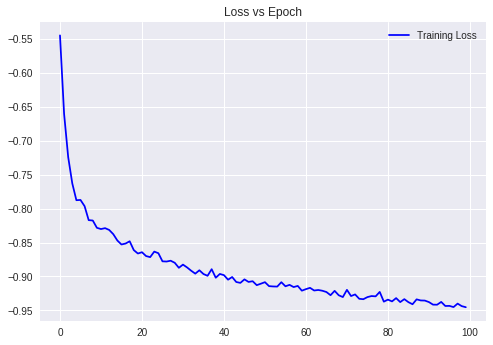

In [445]:
import matplotlib.pyplot as plt
plt.figure("Image")
plt.title("Loss vs Epoch")
# val_loss_history_1 =  [float(i)/sum(val_loss_history_1) for i in val_loss_history_1] # normalised between 0-1
train_loss_history_1 =  [float(i)/sum(train_loss_history) for i in train_loss_history] # normalised between 0-1
# plt.plot(val_loss_history_1, c="red", label="Validation Loss")
plt.plot(train_loss_history, c="blue", label = "Training Loss")
plt.legend()

In [454]:
print('--- AFTER TRAINING ---')
correct = 0
data = []
data = [make_bow_vector(instance, word_to_ix) for instance in test_text_reviews]
tic = time.time()
for i, instance in enumerate(data):
    label = test_text_labels[i]
    bow_vec = Variable(instance)
    logprobs = bow.forward(bow_vec)
#     print(logprobs)
    pred_class = np.argmax(logprobs.data.numpy())
    
#     print('prediction: {}'.format(pred_class))
#     print('actual: {}'.format(label))
    if(int(label) == pred_class):
        correct += 1
toc = time.time()
print("Test Accuracy: {:.2f}%".format(correct*100/len(data)))

--- AFTER TRAINING ---
Test Accuracy: 87.140%


In [0]:
torch.save(bow,'model.json')

from google.colab import files
files.download("model.json")

In [0]:
from google.colab import files
temp_test = files.upload()

In [0]:
torch.load(io.BytesIO(temp_test['model.json']))